In [88]:
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report


In [89]:
df = pd.read_csv("/kaggle/input/winequalityred/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [91]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [92]:
df.shape

(1596, 12)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [94]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [95]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/tmp/ipykernel_43/3282330620.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'], color='salmon')


<Axes: title={'center': 'Quality Distribution Plot'}, xlabel='quality', ylabel='Density'>

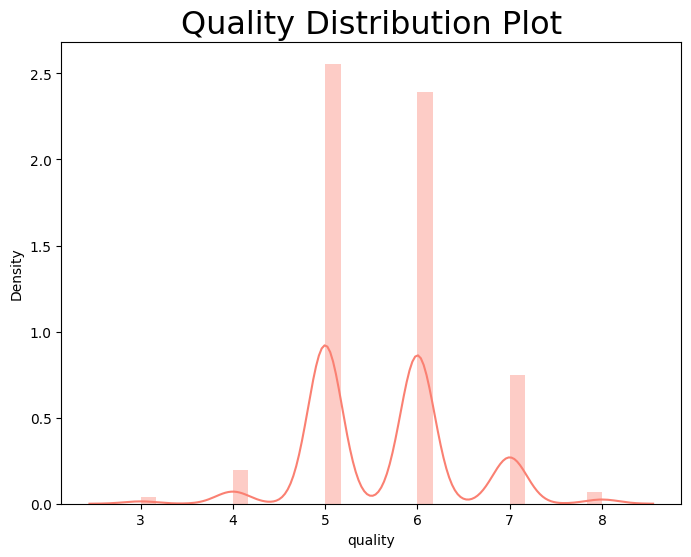

In [96]:
# Create a distribution plot
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Quality Distribution Plot', fontsize=23)
sns.distplot(df['quality'], color='salmon')

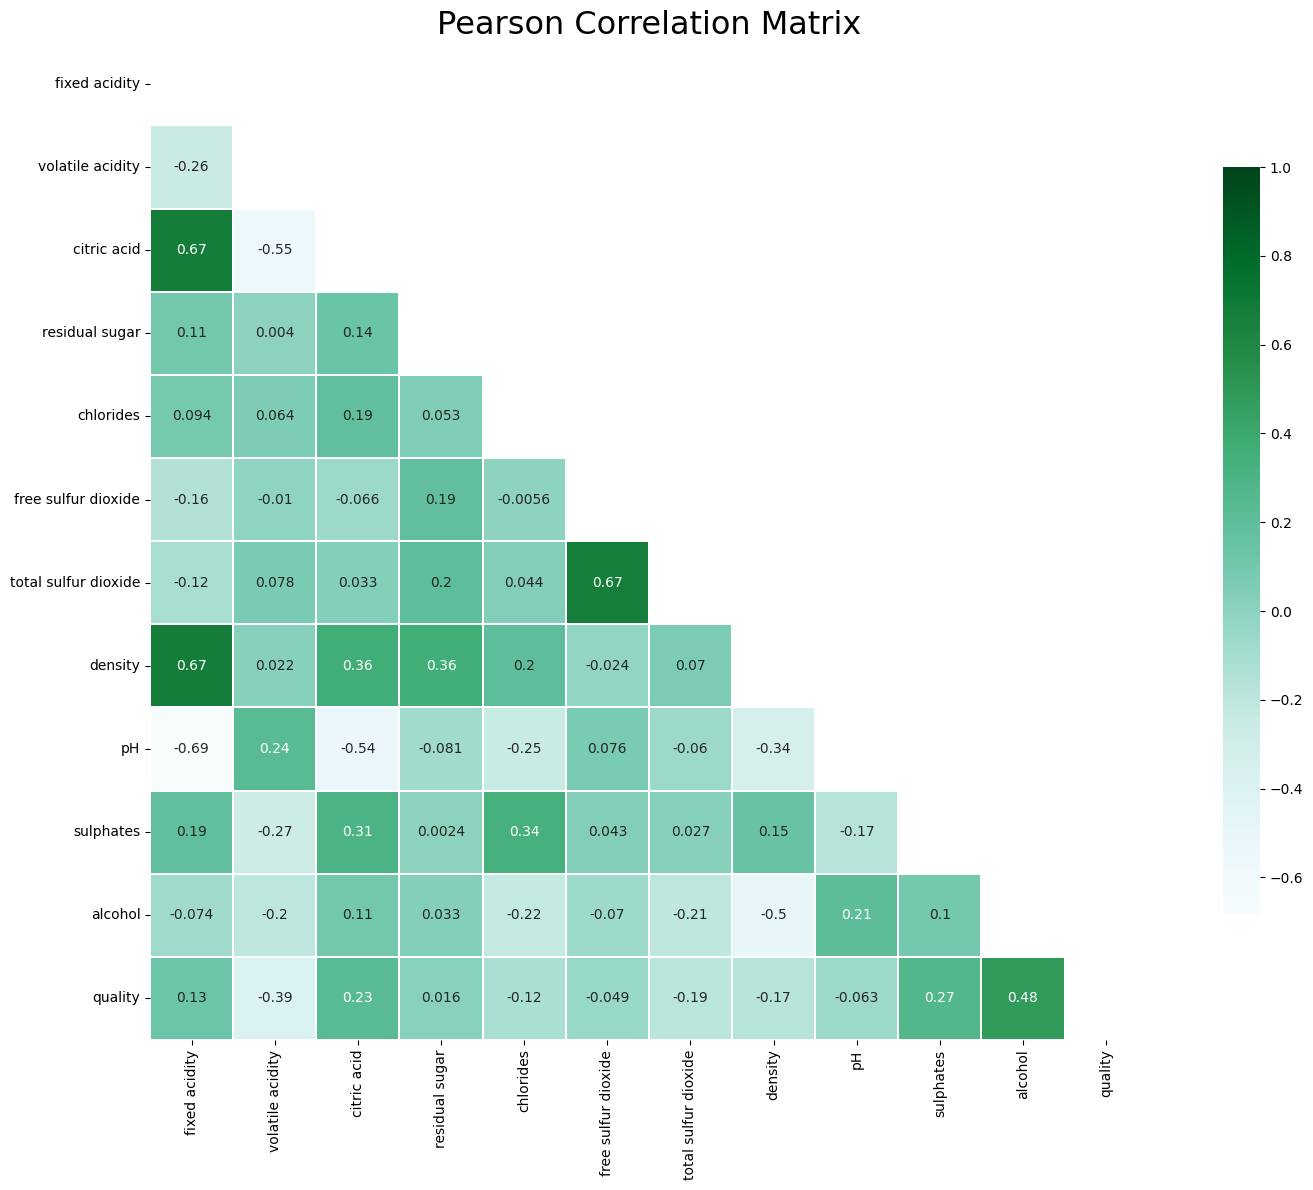

In [97]:
# create correlation matrix
mask = np.zeros_like(df[columns].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=23)

sns.heatmap(df[columns].corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

# most correlating columns
features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']

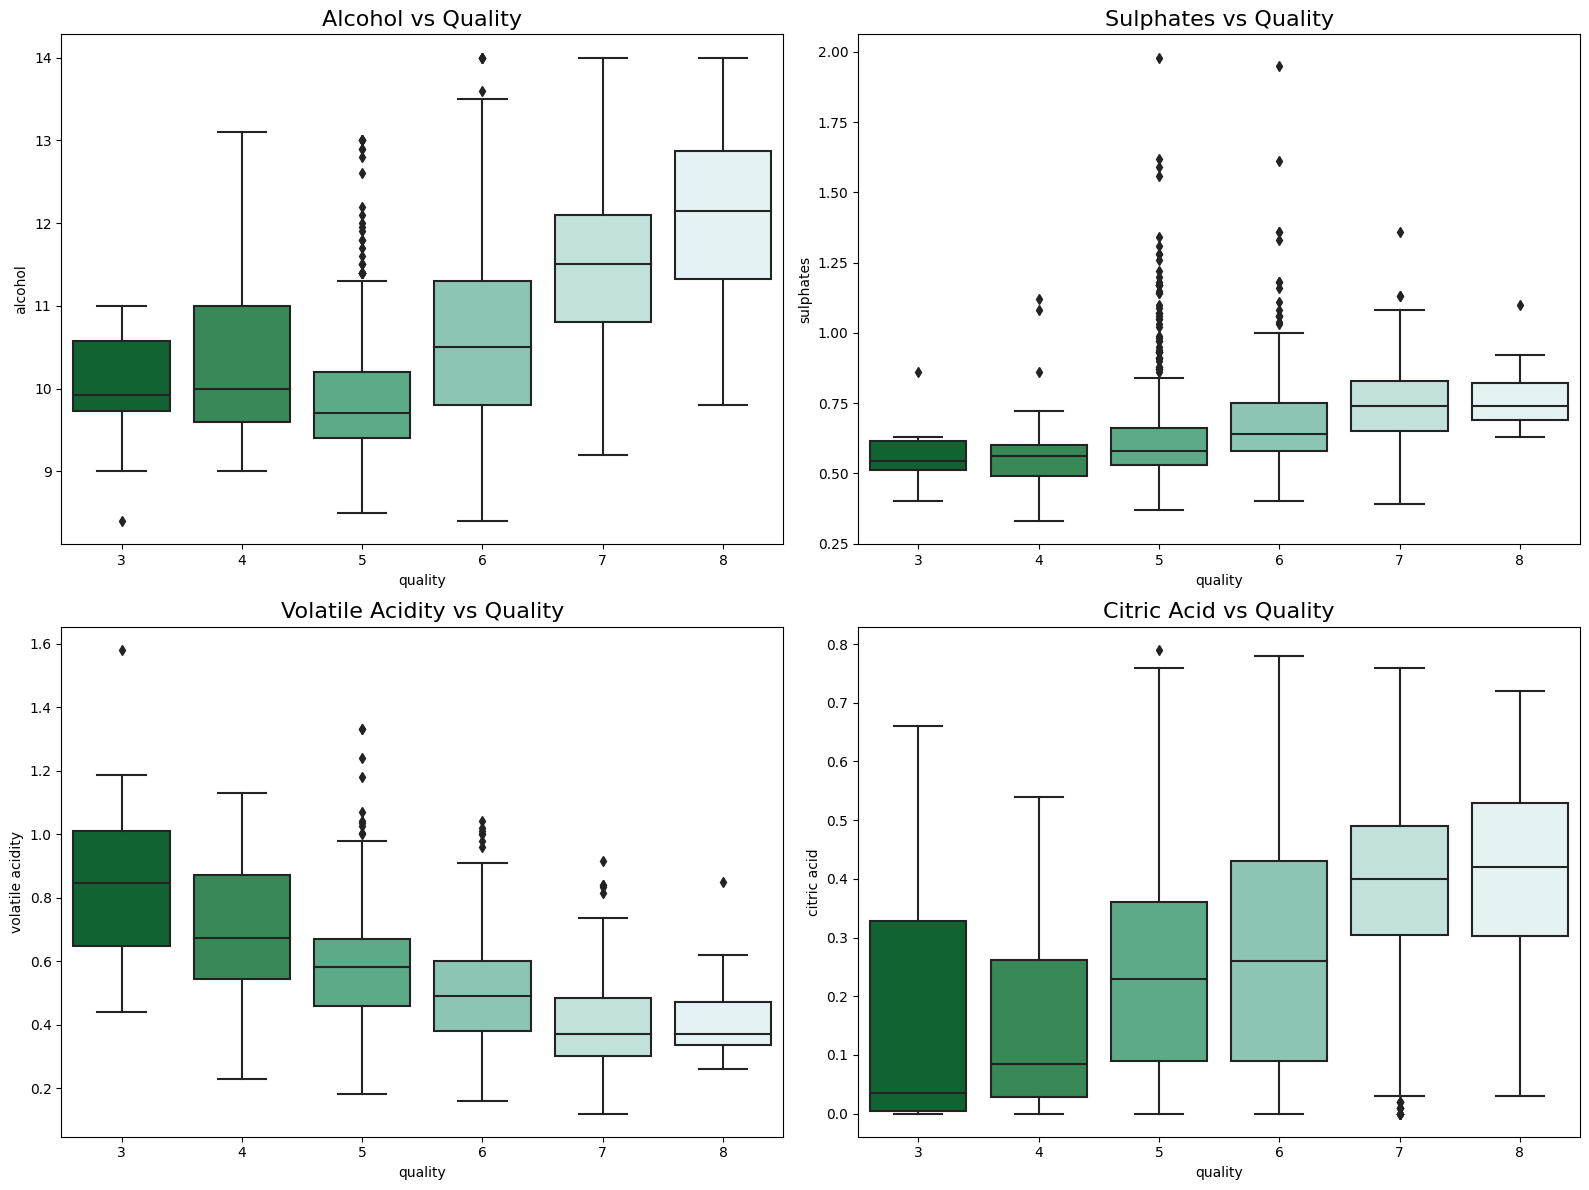

In [98]:
# Create box plots for features
f2, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(x='quality', y='alcohol', data=df, ax=ax[0, 0], palette='BuGn_r')
sns.boxplot(x='quality', y='sulphates', data=df, ax=ax[0, 1], palette='BuGn_r')
sns.boxplot(x='quality', y='volatile acidity', data=df, ax=ax[1, 0], palette='BuGn_r')
sns.boxplot(x='quality', y='citric acid', data=df, ax=ax[1, 1], palette='BuGn_r')

# Add plot titles
ax[0, 0].set_title('Alcohol vs Quality', fontsize=16)
ax[0, 1].set_title('Sulphates vs Quality', fontsize=16)
ax[1, 0].set_title('Volatile Acidity vs Quality', fontsize=16)
ax[1, 1].set_title('Citric Acid vs Quality', fontsize=16)

# Adjust layout for better visualization
f2.tight_layout()

# Show the plot
plt.show()


In [99]:
# Normalizing over the standard deviation
df_dropped = df.drop('quality', axis=1)
X =df_dropped.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

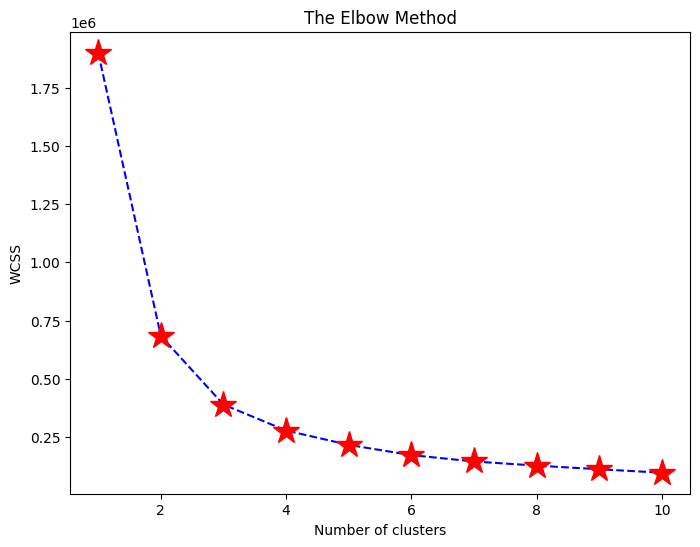

In [104]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve with a marker
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11), wcss, marker='*', linestyle='--', color='b',markerfacecolor='r',mec = 'r',ms = 20)  
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
Kmeans = KMeans(n_clusters=10, init='k-means++',random_state=42)
kmeans.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [107]:
labels = kmeans.labels_

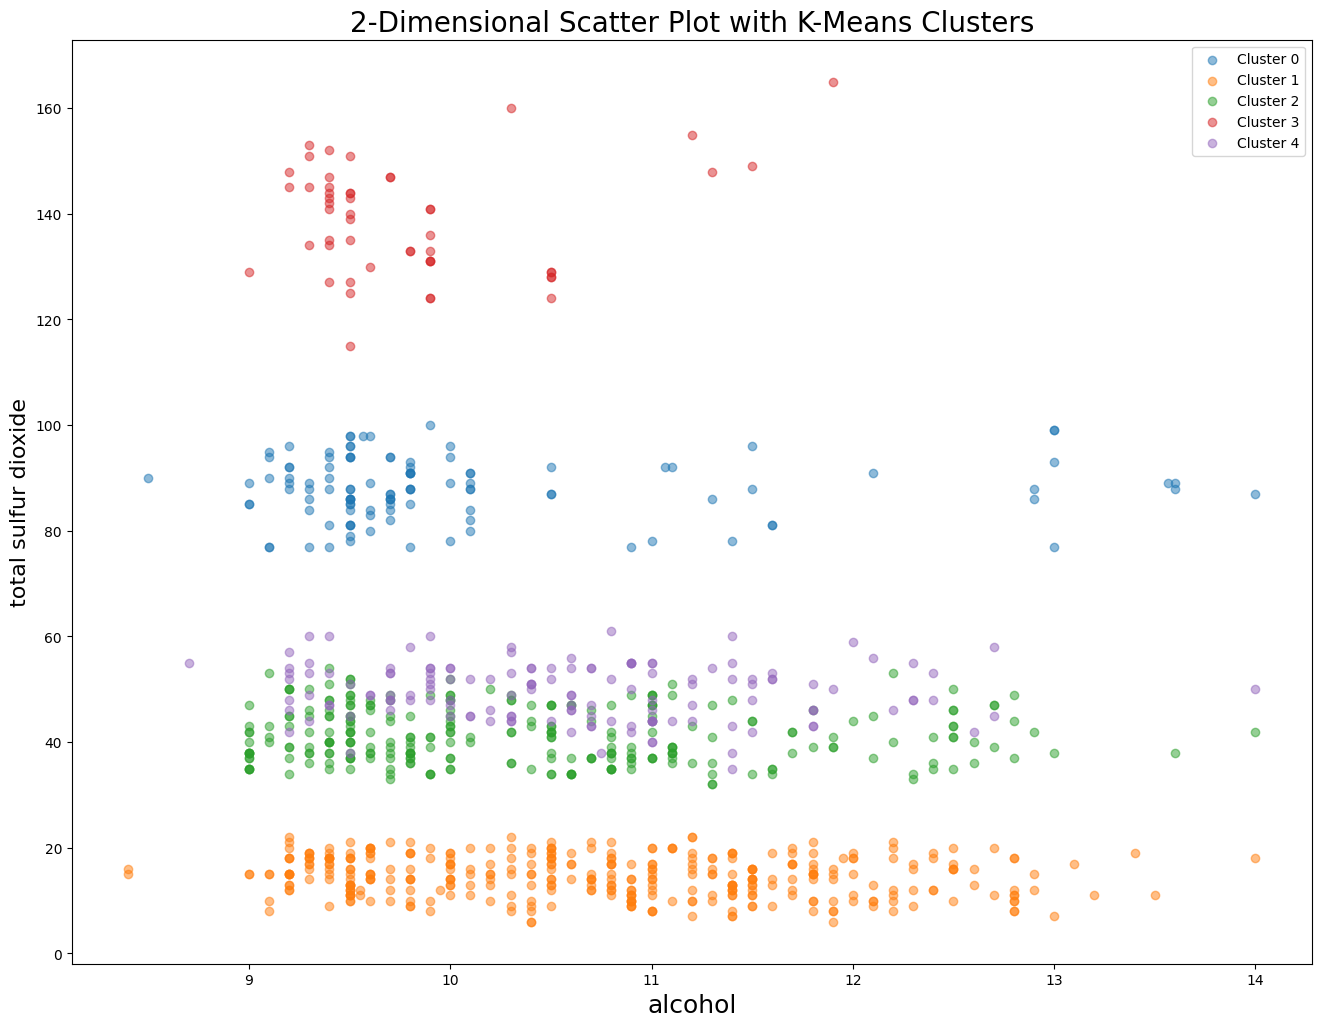

In [113]:
plt.figure(figsize=(16, 12))

for cluster_label in range(5):
    plt.scatter(
        X[labels == cluster_label, 9],  # alcohol
        X[labels == cluster_label, 5],  # total sulfur dioxide
        alpha=0.5,
        label=f'Cluster {cluster_label}',
    )

plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)
plt.title('2-Dimensional Scatter Plot with K-Means Clusters', fontsize=20)
plt.legend()
plt.show()